In [1]:
import json
  
# read json data file
f=open('taxi_requests.json')
data = json.load(f)
f.close()

login_times=data['request_time']

# uncomment next line to see how the data looks like
#display(login_times) 

In [16]:
# convert time string to timestamps
from datetime import datetime
timestamps=[datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').timestamp() for i in range(len(login_times))]
#timestamps

list

In [3]:
import numpy as np

# Written questions

Please search online and read the documentation for strptime() and timestamp() and write down short answers to the following questions:

A- What does the previous cell do? 

تمام دیت تایم های ریکوست ها را میگیرد به شکل استرینگ و سپس آن ها را تبدیل به دیت تایم کرده و سپس آن ها را تبدیل به یک عدد اعشاری میکند که این عدد نشان دهنده این است که از مبدا درنظرگرفته شده تا اون دیت تایم چند ثانیه است 


B- What does the concept of "timestamp" mean? What are its type and unit?

نشان میدهد از اولین زمان تایین شده تا دیت تایم مشخص چند 
ثانیه بوده است ؛مثلا برای دقیقا یک روز بعد از مبدا 86400 ثانیه میشود

type = float


C- Is the variable "timestamps" a list or a numpy array?
list

D- Which day of week (Sunday, Monday, ...) is 1970-01-01?
thursday

E- Which function can convert a timestamp back to datetime?
strftime


# Project questions

Explore data, write code, and search online to answer the following questions about the data:

1- How many days are there in the data?

2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

3- Which hour was the busiest hour (the hour with the most requests)?

4- Are there any two requests that happened at the same time?

5- What is the longest gap between two consequent requests?

6- Overall, does the volume of requests increase or decrease over time?

7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

8- Bonus: Which day of week is the busiest?

9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

10- Bonus: Which dates other than the standard weekend days were holidays?

## Answer to problem 1 
1- How many days are there in the data?

In [4]:
times = np.array(timestamps).astype(int)
days = times // (24*60*60)
unique_days, count_days = np.unique(days, return_counts=True)
print("number of days in data:", len(unique_days))

number of days in data: 103


## Answer to problem 2 
2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

In [5]:
# first day
index = np.argmax(count_days)
print("the busiest day is day number ",unique_days[index])

# second day
count_days[index] = 0
index = np.argmax(count_days)
print("the second busiest day is day number ",unique_days[index])

the busiest day is day number  92
the second busiest day is day number  72


## Answer to problem 3
3- Which hour was the busiest hour (the hour with the most requests)?

In [6]:
hours = times // (60*60)
unique_hours, count_hours = np.unique(hours, return_counts=True)
index = np.argmax(count_hours)
print("the busiest hour is hour number ",unique_hours[index])

the busiest hour is hour number  2233


## Answer to problem 4
4- Are there any two requests that happened at the same time?

In [7]:
len(login_times) != len(np.unique(login_times))

True

len of the main_list and unique_list are not equal. so there are some same data in main_list

## Answer to problem 5
5- What is the longest gap between two consequent requests?

In [8]:
sorted_times = np.sort(times)
temp = np.roll(sorted_times,1)
temp = sorted_times - temp
print(np.max(np.array(temp[1:])),"seconds")

5501 seconds


## Answer to problem 6
6- Overall, does the volume of requests increase or decrease over time?

In [9]:
import matplotlib.pyplot as plt
u_days_6, c_days_6 = np.unique(days, return_counts=True)
u_mounth_6, c_mounth_6 = np.unique(days%30, return_counts=True)
u_week_6, c_week_6 = np.unique(days%7, return_counts=True)

### 6.1 all dataset

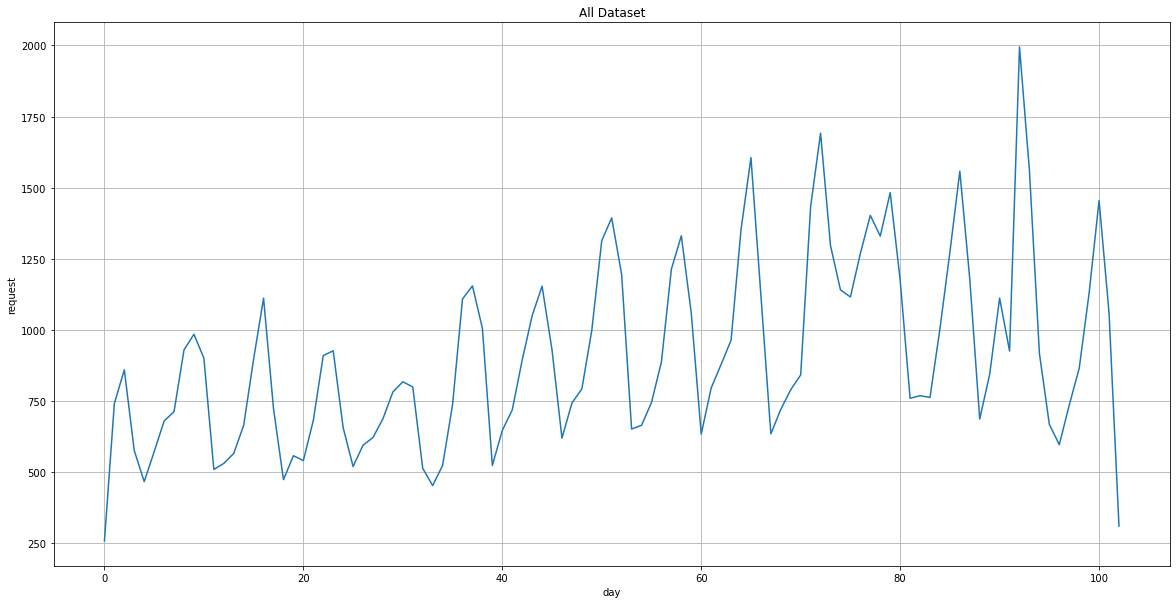

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(u_days_6,c_days_6)
plt.title("All Dataset")
plt.xlabel('day')
plt.ylabel('request')
plt.grid()
plt.show()

### 6.2 Data per mounth

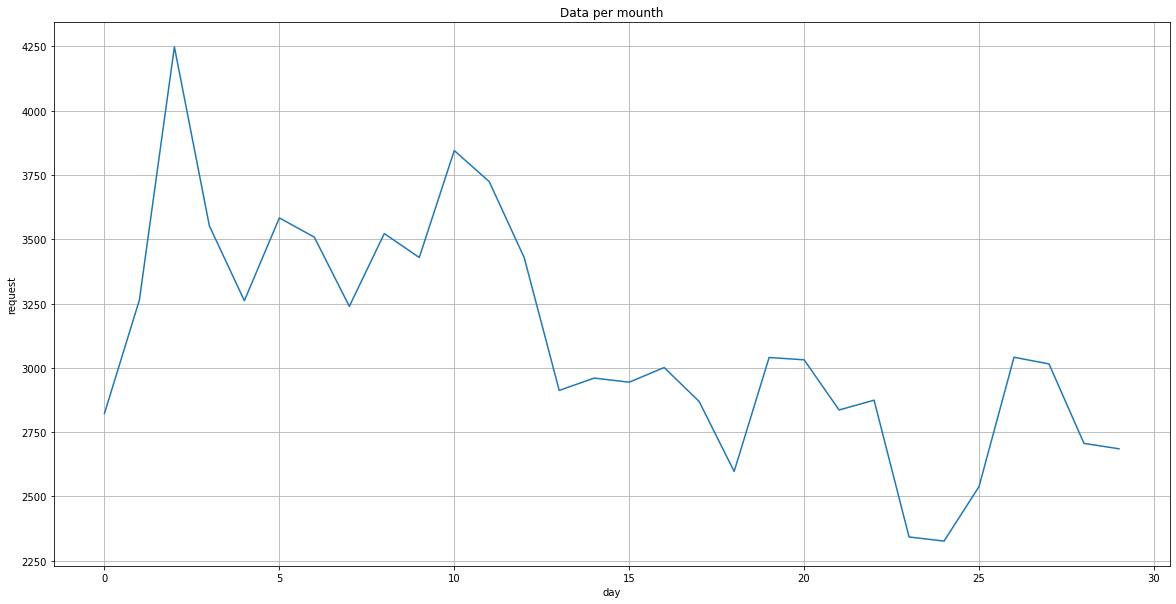

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(u_mounth_6,c_mounth_6)
plt.title("Data per mounth")
plt.xlabel('day')
plt.ylabel('request')
plt.grid()
plt.show()

### 6.3 Data per weak

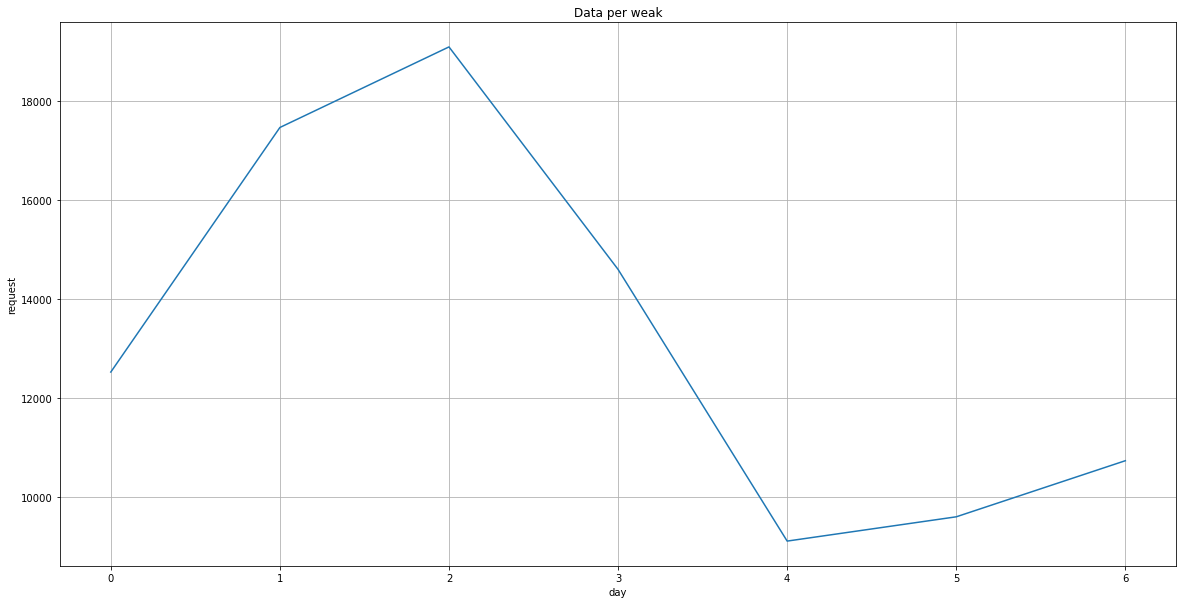

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(u_week_6,c_week_6)
plt.title("Data per weak")
plt.xlabel('day')
plt.ylabel('request')
plt.grid()
plt.show()

## Answer to problem 7
7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

In [13]:
sum_request={}
num_request={}
avg_request={}

for i in times:
    hour_temp = (i%(60 * 60 * 60))/(60 * 60) #if 6<hour_temp<9 should be calculate
    day_temp = i // (24*60*60)
    if hour_temp >= 6 and hour_temp < 9:
        if not i in num_request:
            num_request[day_temp] = 0
            sum_request[day_temp] = 0
        num_request[day_temp] = num_request[day_temp] + 1
        sum_request[day_temp] = sum_request[day_temp] + i  
        
for i in num_request:
    avg_request[i] = sum_request[i]/num_request[i]
    
avg_request

{2: 248288.0,
 5: 463982.0,
 7: 680016.0,
 10: 895637.0,
 12: 1112256.0,
 15: 1328207.0,
 17: 1544204.0,
 20: 1760063.0,
 22: 1976394.0,
 25: 2191943.0,
 27: 2408301.0,
 30: 2624300.0,
 32: 2840386.0,
 35: 3056225.0,
 37: 3272276.0,
 40: 3488368.0,
 42: 3704186.0,
 45: 3919879.0,
 47: 4136327.0,
 50: 4352161.0,
 52: 4568117.0,
 55: 4783889.0,
 57: 5000389.0,
 60: 5216363.0,
 62: 5432346.0,
 65: 5648320.0,
 67: 5864355.0,
 70: 6080346.0,
 72: 6296238.0,
 75: 6512188.0,
 77: 6728357.0,
 80: 6944316.0,
 82: 7160086.0,
 85: 7376236.0,
 87: 7592366.0,
 90: 7808357.0,
 92: 8024267.0,
 95: 8240330.0,
 97: 8456196.0,
 100: 8672314.0}

## Answer to problem 8
8- Bonus: Which day of week is the busiest?

In [14]:
u_day, c_day = np.unique(days%7, return_counts=True)
index = np.argmax(c_day)
print("the busiest day of week is day number:", u_day[index])

the busiest day of week is day number: 2


## Answer to problem 9
9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

In [15]:
u, c = np.unique(hours%(7*24), return_counts=True)
c1 = np.array(c[:111]/15)
c2 = np.array(c[111:]/14)
c3 = np.concatenate((c1, c2))
np.dstack((u, c3))

array([[[  0.        ,  19.8       ],
        [  1.        ,  14.66666667],
        [  2.        ,   6.        ],
        [  3.        ,   4.4       ],
        [  4.        ,   4.6       ],
        [  5.        ,  10.6       ],
        [  6.        ,  25.73333333],
        [  7.        ,  58.6       ],
        [  8.        ,  68.26666667],
        [  9.        ,  41.86666667],
        [ 10.        ,  25.        ],
        [ 11.        ,  26.93333333],
        [ 12.        ,  16.26666667],
        [ 13.        ,  14.73333333],
        [ 14.        ,  18.13333333],
        [ 15.        ,  26.2       ],
        [ 16.        ,  30.8       ],
        [ 17.        ,  50.93333333],
        [ 18.        ,  66.4       ],
        [ 19.        ,  73.53333333],
        [ 20.        ,  65.93333333],
        [ 21.        ,  64.86666667],
        [ 22.        ,  57.73333333],
        [ 23.        ,  43.2       ],
        [ 24.        ,  26.        ],
        [ 25.        ,  23.13333333],
        [ 26

## Answer to problem 10
10- Bonus: Which dates other than the standard weekend days were holidays?